In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [2]:
# %run ./check_DOVS_METHODS.ipynb

In [3]:
from importlib import reload
#reload(Utilities)
#reload(clm)

import sys, os
import re
import pickle

import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype, is_timedelta64_dtype
from scipy import stats
import datetime
import time
from natsort import natsorted, ns
from packaging import version

import copy
import itertools
import adjustText

import pyodbc
#---------------------------------------------------------------------
sys.path.insert(0, os.path.realpath('..'))
import Utilities_config
#-----
import CommonLearningMethods as clm
#-----
from MeterPremise import MeterPremise
#-----
from AMI_SQL import AMI_SQL
from AMINonVee_SQL import AMINonVee_SQL
from AMIEndEvents_SQL import AMIEndEvents_SQL
from AMIUsgInst_SQL import AMIUsgInst_SQL
from DOVSOutages_SQL import DOVSOutages_SQL
#-----
from GenAn import GenAn
from AMINonVee import AMINonVee
from AMIEndEvents import AMIEndEvents
from AMIUsgInst import AMIUsgInst
from DOVSOutages import DOVSOutages
#-----
from DOVSAudit import DOVSAudit
#---------------------------------------------------------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from matplotlib import dates
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_sql_aids_dir())
import Utilities_sql
import TableInfos
from TableInfos import TableInfo
from SQLElement import SQLElement
from SQLElementsCollection import SQLElementsCollection
from SQLSelect import SQLSelectElement, SQLSelect
from SQLFrom import SQLFrom
from SQLWhere import SQLWhereElement, SQLWhere
from SQLJoin import SQLJoin, SQLJoinCollection
from SQLGroupBy import SQLGroupByElement, SQLGroupBy
from SQLHaving import SQLHaving
from SQLOrderBy import SQLOrderByElement, SQLOrderBy
from SQLQuery import SQLQuery
from SQLQueryGeneric import SQLQueryGeneric
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_utilities_dir())
import Utilities
import Utilities_df
import Utilities_dt
from Utilities_df import DFConstructType
import Plot_General
import Plot_Box_sns
import Plot_Hist
import GrubbsTest
import DataFrameSubsetSlicer
from DataFrameSubsetSlicer import DataFrameSubsetSlicer as DFSlicer

In [ ]:
base_dir = r'C:\Users\s346557\Documents\LocalData\dovs_check\Mico2\AllOPCOs'
base_dir_ami = os.path.join(base_dir, r'AMINonVee')
base_dir_ede = os.path.join(base_dir, r'EndEvents')
assert(os.path.exists(base_dir_ami))
assert(os.path.exists(base_dir_ede))

In [ ]:
#-------------------------
outg_rec_nb_to_files_dict_path_ami = os.path.join(base_dir, 'outg_rec_nb_to_files_dict.pkl')
outg_rec_nb_to_files_dict_path_ede = os.path.join(base_dir, 'outg_rec_nb_to_files_ede_dict.pkl')
#-----
if os.path.exists(outg_rec_nb_to_files_dict_path_ami):
    with open(outg_rec_nb_to_files_dict_path_ami, 'rb') as handle:
        outg_rec_nb_to_files_dict = pickle.load(handle)
else:
    outg_rec_nb_to_files_dict = DOVSAudit.build_outg_rec_nb_to_files_dict(
        base_dir        = base_dir_ami, 
        glob_pattern    = r'ami_nonvee_[0-9]*.csv', 
        regex_pattern   = None,
        outg_rec_nb_col = 'OUTG_REC_NB_GPD_FOR_SQL', 
        save_path       = outg_rec_nb_to_files_dict_path_ami
    )
#-----
if os.path.exists(outg_rec_nb_to_files_dict_path_ede):
    with open(outg_rec_nb_to_files_dict_path_ede, 'rb') as handle:
        outg_rec_nb_to_files_ede_dict = pickle.load(handle)
else:
    outg_rec_nb_to_files_ede_dict = DOVSAudit.build_outg_rec_nb_to_files_dict(
        base_dir        = base_dir_ede, 
        glob_pattern    = r'end_events_[0-9]*.csv', 
        regex_pattern   = None,
        outg_rec_nb_col = 'OUTG_REC_NB_GPD_FOR_SQL', 
        save_path       = outg_rec_nb_to_files_dict_path_ede
    )

In [ ]:
# #-------------------------
# # Build dovs_df for all, if you want
# dovs = DOVSOutages(
#     df_construct_type=DFConstructType.kRunSqlQuery, 
#     contstruct_df_args=None, 
#     init_df_in_constructor=True,
#     build_sql_function=DOVSOutages_SQL.build_sql_std_outage, 
#     build_sql_function_kwargs=dict(
#         outg_rec_nbs=outg_rec_nbs, 
#         field_to_split='outg_rec_nbs', 
#         include_premise=True
#     ), 
#     build_consolidated=True
# )
# dovs_df = dovs.df.copy()

In [ ]:
outg_rec_nb = '13551139'
# outg_rec_nb = '13579980'

In [ ]:
audit_i = DOVSAudit(
    outg_rec_nb=outg_rec_nb
)

In [ ]:
audit_i.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)

In [ ]:
audit_i.load_ami_from_csvs(
    paths                          = outg_rec_nb_to_files_dict[outg_rec_nb], 
    slicers                        = None, 
    ami_df_info_dict               = None, 
    run_std_init                   = True, 
    cols_and_types_to_convert_dict = None, 
    to_numeric_errors              = 'coerce', 
    drop_na_rows_when_exception    = True, 
    drop_unnamed0_col              = True, 
    pd_read_csv_kwargs             = None, 
    make_all_columns_lowercase     = False, 
    assert_all_cols_equal          = True, 
    min_fsize_MB                   = None
)

In [ ]:
if outg_rec_nb in outg_rec_nb_to_files_ede_dict.keys():
    audit_i.load_ede_from_csvs(
        paths                          = outg_rec_nb_to_files_ede_dict[outg_rec_nb], 
        slicers                        = None, 
        ede_df_info_dict               = None, 
        run_std_init                   = True, 
        cols_and_types_to_convert_dict = None, 
        to_numeric_errors              = 'coerce', 
        drop_na_rows_when_exception    = True, 
        drop_unnamed0_col              = True, 
        pd_read_csv_kwargs             = None, 
        make_all_columns_lowercase     = False, 
        assert_all_cols_equal          = True, 
        min_fsize_MB                   = None
    )

In [ ]:
audit_i.build_best_ests_df()
audit_i.best_ests_df

In [ ]:
audit_i.identify_overlaps(overlaps_dovs_sql_fcn=DOVSOutages_SQL.build_sql_outage)

In [ ]:
audit_i.best_ests_df_w_keep_info

In [ ]:
audit_i.best_ests_df

# IF ANY has keep==False, then further analysis is needed
Probably want to output/notify user

In [ ]:
(audit_i.best_ests_df_w_keep_info['keep']==False).sum()

In [ ]:
overlap_outg_rec_nbs = list(set(audit_i.best_ests_df_w_keep_info['overlap_DOVS'].sum()))
overlap_outg_rec_nbs

In [ ]:
audit_i.outg_rec_nb

# Option to either:
1. Build ovrlp_audit_a using ami_df_i from audit_i
    - less safe method, but checks can be put in place to switch to method 2 if criteria not met
    - should run quicker
    - currently, ovrlp_audit_a below

2. Build ovrlp_audit_a from scratch
    - safer method
    - almost certainly takes longer
    - - currently, ovrlp_audit_a2 below
    
For 13551139, both options give same result!

In [ ]:
# OPTION 1 (as described above)
#-------------------------
j=0
#-------------------------
ovrlp_audit_a = DOVSAudit(
    outg_rec_nb=overlap_outg_rec_nbs[j]
)
#-------------------------
ovrlp_audit_a.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)
#-------------------------
PNs_a = ovrlp_audit_a.PNs_dovs
#-----
ami_df_a = audit_i.ami_df_i.drop(columns=['removed_due_to_overlap']).copy()
ami_df_a = ami_df_a[ami_df_a[audit_i.ami_df_info_dict['PN_col']].isin(PNs_a)]
#-----
ede_df_a = audit_i.ede_df_i.copy()
ede_df_a = ede_df_a[ede_df_a[audit_i.ede_df_info_dict['PN_col']].isin(PNs_a)]
#-------------------------
ovrlp_audit_a.load_ami_from_df(
    ami_df_i         = ami_df_a, 
    ami_df_info_dict = audit_i.ami_df_info_dict, 
    run_std_init     = False, 
    slicers          = None
)
#-----
ovrlp_audit_a.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)
#-----
ovrlp_audit_a.load_ede_from_df(
    ede_df_i         = ede_df_a, 
    ede_df_info_dict = audit_i.ede_df_info_dict, 
    run_std_init     = False
)
#-------------------------
ovrlp_audit_a.build_best_ests_df()
#-------------------------
ovrlp_audit_a.identify_overlaps(
    overlaps_dovs_sql_fcn=DOVSOutages_SQL.build_sql_outage
)

In [ ]:
ovrlp_audit_a.best_ests_df_w_keep_info

In [ ]:
# OPTION 2 (as described above)
#-------------------------
search_time_half_window=pd.Timedelta('24 hours')
#-------------------------
j=0
#-------------------------
ovrlp_audit_a2 = DOVSAudit(
    outg_rec_nb=overlap_outg_rec_nbs[j]
)
#-------------------------
ovrlp_audit_a2.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)
#-------------------------
ovrlp_audit_a2.build_mp_df(
    drop_mp_dups_fuzziness=pd.Timedelta('1 hour')
)
#-------------------------
ovrlp_audit_a2.run_ami_and_ede_daq(
    search_time_half_window=search_time_half_window
)
#-------------------------
ovrlp_audit_a2.build_best_ests_df()
#-------------------------
ovrlp_audit_a2.identify_overlaps(
    overlaps_dovs_sql_fcn=DOVSOutages_SQL.build_sql_outage
)

In [ ]:
ovrlp_audit_a2.best_ests_df

In [ ]:
ovrlp_audit_a2.best_ests_df_w_keep_info

In [ ]:
print(ovrlp_audit_a.best_ests_df_w_keep_info.equals(ovrlp_audit_a2.best_ests_df_w_keep_info))
print(ovrlp_audit_a.best_ests_df.equals(ovrlp_audit_a2.best_ests_df))

In [ ]:
# Columns whose values can be used to uniquely identify an entry in best_ests_df_w_keep_info
unq_idfr_cols = ['PN', 'i_outg']

In [ ]:
(audit_i.best_ests_df_w_keep_info['keep']==False).sum()

In [ ]:
be_df_wki_i       = audit_i.best_ests_df_w_keep_info.copy()
ovrlp_be_df_wki_a = ovrlp_audit_a.best_ests_df_w_keep_info.copy()
# #-------------------------
# # Sanity check: Make sure audit_i.outg_rec_nb found somewhere in ovrlp_be_df_wki_a
# assert((ovrlp_be_df_wki_a['overlap_DOVS'].apply(lambda x: audit_i.outg_rec_nb in x)).any())
# #-----
# # Only interested in entires in ovrlp_be_df_wki_a which overlap with audit_i.outg_rec_nb
# ovrlp_be_df_wki_a=ovrlp_be_df_wki_a[
#     ovrlp_be_df_wki_a['overlap_DOVS'].apply(lambda x: audit_i.outg_rec_nb in x)
# ]
# #-------------------------
# # Sanity check: Make sure ovrlp_audit_a.outg_rec_nb found somewhere in be_df_wki_i
# assert((be_df_wki_i['overlap_DOVS'].apply(lambda x: ovrlp_audit_a.outg_rec_nb in x)).any())
# #-----
# # Only interested in entires in be_df_wki_i which overlap with ovrlp_audit_a.outg_rec_nb
# be_df_wki_i=be_df_wki_i[
#     be_df_wki_i['overlap_DOVS'].apply(lambda x: ovrlp_audit_a.outg_rec_nb in x)
# ]

# Resolve overlaps

In [ ]:
audit_a = copy.deepcopy(audit_i)
audit_b = copy.deepcopy(ovrlp_audit_a)
unq_idfr_cols = ['PN', 'i_outg']
PN_col='PN'
t_min_col='winner_min'
t_max_col='winner_max'
keep_col='keep'
overlap_DOVS_col='overlap_DOVS'
open_beg_col = 'open_beg'
open_end_col = 'open_end'

In [ ]:
audit_a1 = copy.deepcopy(audit_i)
audit_a2 = copy.deepcopy(audit_i)
audit_a3 = copy.deepcopy(audit_i)
audit_a4 = copy.deepcopy(audit_i)

audit_b1 = copy.deepcopy(ovrlp_audit_a)
audit_b2 = copy.deepcopy(ovrlp_audit_a)
audit_b3 = copy.deepcopy(ovrlp_audit_a)
audit_b4 = copy.deepcopy(ovrlp_audit_a)

In [ ]:
PNs_to_resolve_A = audit_a.best_ests_df_w_keep_info[audit_a.best_ests_df_w_keep_info['keep']==False]['PN'].unique().tolist()
# PNs_to_resolve_B = audit_a.best_ests_df_w_keep_info['PN'].unique().tolist()
PNs_to_resolve_B = None

In [ ]:
adjustment_dicts_1 = DOVSAudit.resolve_overlapping_audits(
    audit_a          = audit_a1, 
    audit_b          = audit_b1, 
    PNs_to_resolve   = PNs_to_resolve_A, 
    unq_idfr_cols    = unq_idfr_cols, 
    PN_col           = PN_col, 
    t_min_col        = t_min_col, 
    t_max_col        = t_max_col, 
    keep_col         = keep_col, 
    overlap_DOVS_col = overlap_DOVS_col, 
    open_beg_col     = open_beg_col, 
    open_end_col     = open_end_col
)

In [ ]:
adjustment_dicts_2 = DOVSAudit.resolve_overlapping_audits_v2(
    audit_a          = audit_a2, 
    audit_b          = audit_b2, 
    PNs_to_resolve   = PNs_to_resolve_A, 
    unq_idfr_cols    = unq_idfr_cols, 
    PN_col           = PN_col, 
    t_min_col        = t_min_col, 
    t_max_col        = t_max_col, 
    keep_col         = keep_col, 
    overlap_DOVS_col = overlap_DOVS_col, 
    open_beg_col     = open_beg_col, 
    open_end_col     = open_end_col
)

In [ ]:
adjustment_dicts_3 = DOVSAudit.resolve_overlapping_audits(
    audit_a          = audit_a3, 
    audit_b          = audit_b3, 
    PNs_to_resolve   = PNs_to_resolve_B, 
    unq_idfr_cols    = unq_idfr_cols, 
    PN_col           = PN_col, 
    t_min_col        = t_min_col, 
    t_max_col        = t_max_col, 
    keep_col         = keep_col, 
    overlap_DOVS_col = overlap_DOVS_col, 
    open_beg_col     = open_beg_col, 
    open_end_col     = open_end_col
)

In [ ]:
adjustment_dicts_4 = DOVSAudit.resolve_overlapping_audits_v2(
    audit_a          = audit_a4, 
    audit_b          = audit_b4, 
    PNs_to_resolve   = PNs_to_resolve_B, 
    unq_idfr_cols    = unq_idfr_cols, 
    PN_col           = PN_col, 
    t_min_col        = t_min_col, 
    t_max_col        = t_max_col, 
    keep_col         = keep_col, 
    overlap_DOVS_col = overlap_DOVS_col, 
    open_beg_col     = open_beg_col, 
    open_end_col     = open_end_col
)

In [ ]:
# Expect True
print(audit_a1.best_ests_df_w_keep_info.equals(audit_a2.best_ests_df_w_keep_info))
print(audit_a1.best_ests_df_w_keep_info.equals(audit_a3.best_ests_df_w_keep_info))
print(audit_a1.best_ests_df_w_keep_info.equals(audit_a4.best_ests_df_w_keep_info))

print(audit_b1.best_ests_df_w_keep_info.equals(audit_b2.best_ests_df_w_keep_info))
print(audit_b1.best_ests_df_w_keep_info.equals(audit_b3.best_ests_df_w_keep_info))
print(audit_b1.best_ests_df_w_keep_info.equals(audit_b4.best_ests_df_w_keep_info))

In [ ]:
audit_a1.best_ests_df

In [ ]:
audit_a1.best_ests_df = audit_a1.best_ests_df_w_keep_info[audit_a1.best_ests_df_w_keep_info['keep']==True].drop(columns=['overlap_DOVS', 'overlap_times', 'keep'])

In [ ]:
%run ./check_DOVS_METHODS.ipynb

In [ ]:
best_ests_df = audit_a1.best_ests_df.copy()
ami_df_i = audit_a1.ami_df_i.copy()
#-----
dovs_outg_t_beg_end = audit_a1.dovs_outg_t_beg_end
dovs_outg_t_beg = dovs_outg_t_beg_end[0]
dovs_outg_t_end = dovs_outg_t_beg_end[1]
#-----
outage_nb  = audit_a1.outage_nb
n_PNs_dovs = audit_a1.n_PNs_dovs
ci_dovs    = audit_a1.ci_cmi_dovs[0]
cmi_dovs   = audit_a1.ci_cmi_dovs[1]
ci_ami     = best_ests_df['PN'].nunique() 
cmi_ami    = (best_ests_df['winner_max']-best_ests_df['winner_min']).sum().total_seconds()/60
threshold=95
#-------------------------
outg_SNs = best_ests_df['PN'].unique().tolist()
ami_df_i_out      = ami_df_i[ami_df_i['aep_premise_nb'].isin(outg_SNs)]
ami_df_i_not_out  = ami_df_i[~ami_df_i['aep_premise_nb'].isin(outg_SNs)]
#-------------------------
means_df, best_ests_df_w_db_lbl = DOVSAudit.get_mean_times_w_dbscan(
    best_ests_df, 
    eps_min=5, 
    min_samples=2, 
    ests_to_include_in_clustering=['winner_min', 'winner_max'],
    ests_to_include_in_output=[
        'winner_min', 'winner_max', 
        'conservative_min', 'conservative_max', 
        'zero_times_min', 'zero_times_max'
    ], 
    return_labelled_best_ests_df=True
)
#-------------------------
n_PNs_w_power_srs = DOVSAudit.build_n_PNs_w_power_srs(
    best_ests_df, 
    ami_df_i, 
    return_pct=True, 
    PN_col='PN', 
    t_min_col='winner_min', 
    t_max_col='winner_max', 
    i_outg_col='i_outg', 
    PN_col_ami_df='aep_premise_nb'
)

In [ ]:
fig_num=0
fig, axs = plot_all_out_not_NEW(
    fig_num              = fig_num, 
    ami_df_i             = ami_df_i, 
    ami_df_i_out         = ami_df_i_out, 
    ami_df_i_not_out     = ami_df_i_not_out, 
    dovs_outg_t_beg      = dovs_outg_t_beg, 
    dovs_outg_t_end      = dovs_outg_t_end, 
    cnsrvtv_out_t_beg    = best_ests_df['conservative_min'].min(), 
    cnsrvtv_out_t_end    = best_ests_df['conservative_max'].max(), 
    means_df             = means_df, 
    outg_rec_nb          = outg_rec_nb, 
    outage_nb            = outage_nb, 
    n_PNs_dovs           = n_PNs_dovs, 
    ci_dovs              = ci_dovs, 
    cmi_dovs             = cmi_dovs, 
    ci_ami               = ci_ami, 
    cmi_ami              = cmi_ami, 
    name                 = 'AMI', 
    results_2_dict       = None, 
    expand_time          = pd.Timedelta('1 hour'), 
    mean_keys_to_include = ['winner', 'conservative', 'zero_times'], 
    removed_due_to_overlap_col='removed_due_to_overlap', 
    default_subplots_args=dict(n_x=2, n_y=2, row_major=True, sharex=True), 
    leg_i_plot=1, 
    leg_kwargs=dict(ncols=1, fontsize=15, bbox_to_anchor=(1, 1.2)), 
    ci_info_fontsize=16, 
    left_text_x=0.915
    
)

fig,axs[3] = DOVSAudit.plot_n_PNs_w_power_srs(
    n_PNs_w_power_srs, 
    simp_freq='1T', 
    threshold=threshold, 
    fig_num=fig_num, 
    fig_ax=(fig, axs[3]), 
    threshold_color='magenta'
)

fig_num += 1

In [ ]:
def remove_overlap_from_interval_w_split(
    interval, 
    overlap, 
    split_interval=False
):
    r"""
    Not really used anywhere.
    This is how remove_overlap_from_interval was originally written, but I reduced the functionality to
      simplify things.
    So, this exists in case I desire the functionality later.
    
    Given an input interval and possible overlap interval, remove overlap from the interval.
    Both interval and overlap should be lists/tuples of length 2 whose elements represent the beginning and
      ending of the interval.
    
    By default, this will not split the input interval.
        If the overlap does split the interval, the portion of interval occurring prior to the overlap will be returned.
        The intent of this function is to remove any DOVS events overlapping with the algorithm outage times.
        Therefore, in such a split situation, we would not want anything after the first overlap.
    --------------------------------------------------
    There are basically 4 distinct situations
      1. overlap completely encompasses interval 
           ==> returned interval should be empty
      2. interval completely encompasses overlap
           - if split_interval==True: 
                 return the two sub-intervals on either side of overlap
           - if split_interval==False: 
                 return the first sub-interval which occurs prior to overlap
      3. overlap begins BEFORE interval begins and ends BEFORE interval ends
           ==> return portion of interval occurring after overlap ends
      4. overlap begins AFTER interval begins and ends AFTER interval ends
           ==> return portion of interval occurring before overlap begins
    """
    #--------------------------------------------------
    assert(Utilities.is_object_one_of_types(interval, [list, tuple]))
    assert(Utilities.is_object_one_of_types(overlap, [list, tuple]))
    #-----
    if len(interval)==0:
        return interval
    #-----
    assert(len(interval)==2)
    assert(len(overlap)==2)
    #-----
    assert(interval[1] > interval[0])
    assert(overlap[1]  > overlap[0])
    #-------------------------
    # If the two do not overlap, simply return interval
    if not pd.Interval(interval[0], interval[1]).overlaps(pd.Interval(overlap[0], overlap[1])):
        return interval
    #--------------------------------------------------
    # 4 distinct situations described in function documentation
    #-------------------------
    # 1. overlap completely encompasses interval 
    if (overlap[0] <= interval[0]) and (overlap[1] >= interval[1]):
        return []
    #-------------------------
    # 2. interval completely encompasses overlap
    if (interval[0] <= overlap[0]) and (interval[1] >= overlap[1]):
        intrvl_1 = [interval[0], overlap[0]]
        intrvl_2 = [overlap[1],  interval[1]]
        if split_interval:
            return intrvl_1, intrvl_2
        else:
            return intrvl_1
        
    #-------------------------
    # 3. overlap begins BEFORE interval begins and ends BEFORE interval ends
    #     ==> return portion of interval occurring after overlap ends
    if overlap[0] < interval[0]:
        assert(overlap[1] < interval[1])
        return [overlap[1], interval[1]]
    
    #-------------------------
    # 4. overlap begins AFTER interval begins and ends AFTER interval ends
    #     ==> return portion of interval occurring before overlap begins
    if overlap[0] > interval[0]:
        assert(overlap[1] > interval[1])
        return [interval[0], overlap[0]]
    
    #-------------------------
    # SHOULD NEVER REACH THIS POINT!
    print('In remove_overlap_from_interval: None of 4 distinct situations caught current!\nCRASH IMMINENT!')
    print(f'interval = {interval}')
    print(f'overlap  = {overlap}')
    assert(0)

In [ ]:
def remove_overlap_from_interval(
    interval, 
    overlap, 
    return_removed=False
):
    r"""
    Given an input interval and possible overlap interval, remove overlap from the interval.
    Both interval and overlap should be lists/tuples of length 2 whose elements represent the beginning and
      ending of the interval.
    
    This will NOT split the input interval.
        If the overlap does split the interval, the portion of interval occurring prior to the overlap will be returned.
        The intent of this function is to remove any DOVS events overlapping with the algorithm outage times.
        Therefore, in such a split situation, we would not want anything after the first overlap.
    --------------------------------------------------
    There are basically 4 distinct situations
      1. overlap completely encompasses interval 
           ==> returned interval should be empty
      2. interval completely encompasses overlap
           ==> return the first sub-interval which occurs prior to overlap
      3. overlap begins BEFORE interval begins and ends BEFORE interval ends
           ==> return portion of interval occurring after overlap ends
      4. overlap begins AFTER interval begins and ends AFTER interval ends
           ==> return portion of interval occurring before overlap begins
    """
    #--------------------------------------------------
    assert(Utilities.is_object_one_of_types(interval, [list, tuple]))
    assert(Utilities.is_object_one_of_types(overlap, [list, tuple]))
    #-----
    if len(interval)==0:
        if return_removed:
            return interval, []
        return interval
    #-----
    assert(len(interval)==2)
    assert(len(overlap)==2)
    #-----
    assert(interval[1] > interval[0])
    assert(overlap[1]  > overlap[0])
    #-------------------------
    # If the two do not overlap, simply return interval
    if not pd.Interval(interval[0], interval[1]).overlaps(pd.Interval(overlap[0], overlap[1])):
        rtrn_intrvl = []
        rmvd_intrvl = []
        if return_removed:
            return rtrn_intrvl, rmvd_intrvl
        return rtrn_intrvl
    #--------------------------------------------------
    # 4 distinct situations described in function documentation
    #-------------------------
    # 1. overlap completely encompasses interval 
    if (overlap[0] <= interval[0]) and (overlap[1] >= interval[1]):
        rtrn_intrvl = []
        rmvd_intrvl = [overlap[0], overlap[1]]
        if return_removed:
            return rtrn_intrvl, rmvd_intrvl
        return rtrn_intrvl
    #-------------------------
    # 2. interval completely encompasses overlap
    if (interval[0] <= overlap[0]) and (interval[1] >= overlap[1]):
        rtrn_intrvl = [interval[0], overlap[0]]
        rmvd_intrvl = [overlap[0], interval[1]]
        if return_removed:
            return rtrn_intrvl, rmvd_intrvl
        return rtrn_intrvl
        
    #-------------------------
    # 3. overlap begins BEFORE interval begins and ends BEFORE interval ends
    #     ==> return portion of interval occurring after overlap ends
    if overlap[0] < interval[0]:
        assert(overlap[1] < interval[1])
        rtrn_intrvl = [overlap[1], interval[1]]
        rmvd_intrvl = [overlap[0], overlap[1]]
        if return_removed:
            return rtrn_intrvl, rmvd_intrvl
        return rtrn_intrvl
    
    #-------------------------
    # 4. overlap begins AFTER interval begins and ends AFTER interval ends
    #     ==> return portion of interval occurring before overlap begins
    if overlap[0] > interval[0]:
        assert(overlap[1] > interval[1])
        rtrn_intrvl = [interval[0], overlap[0]]
        rmvd_intrvl = [overlap[0], overlap[1]]
        if return_removed:
            return rtrn_intrvl, rmvd_intrvl
        return rtrn_intrvl
    
    #-------------------------
    # SHOULD NEVER REACH THIS POINT!
    print('In remove_overlap_from_interval: None of 4 distinct situations caught current!\nCRASH IMMINENT!')
    print(f'interval = {interval}')
    print(f'overlap  = {overlap}')
    assert(0)

In [ ]:
def remove_overlaps_from_interval(
    interval, 
    overlaps, 
    return_removed=False
):
    r"""
    Remove multiple possible overlaps from interval
    """
    #-------------------------
    assert(isinstance(overlaps, list))
    assert(Utilities.are_all_list_elements_one_of_types(lst=overlaps, types=[list, tuple]))
    assert(Utilities.are_list_elements_lengths_homogeneous(lst=overlaps, length=2))
    #-------------------------
    return_int = copy.deepcopy(interval)
    removed_intrvls = []
    for overlap_i in overlaps:
        if len(return_int)==0:
            break
        return_int, rmvd_intrvl_i = remove_overlap_from_interval(
            interval       = return_int, 
            overlap        = overlap_i, 
            return_removed = True
        )
        removed_intrvls.append(rmvd_intrvl_i)
    #-------------------------
    if return_removed:
        return return_int, removed_intrvls
    return return_int

In [ ]:
best_ests_df_w_keep_info = audit_i.best_ests_df_w_keep_info.copy()

In [ ]:
best_ests_df_w_keep_info

In [ ]:
# winner_min    = best_ests_df_w_keep_info[best_ests_df_w_keep_info['keep']==False].iloc[0]['winner_min']
# winner_max    = best_ests_df_w_keep_info[best_ests_df_w_keep_info['keep']==False].iloc[0]['winner_max']
# overlap_times = best_ests_df_w_keep_info[best_ests_df_w_keep_info['keep']==False].iloc[0]['overlap_times']

winner_min    = best_ests_df_w_keep_info.iloc[3]['winner_min']
winner_max    = best_ests_df_w_keep_info.iloc[3]['winner_max']
overlap_times = best_ests_df_w_keep_info.iloc[3]['overlap_times']

print(winner_min)
print(winner_max)
print(overlap_times)

In [ ]:
# remove_overlap_from_interval(
#     interval = [winner_min, winner_max], 
#     overlap = overlap_times[0], 
#     return_removed=False
# )

In [ ]:
# remove_overlap_from_interval(
#     interval = [winner_min, winner_max], 
#     overlap = overlap_times[0], 
#     return_removed=True
# )

In [ ]:
# r1,r2 = remove_overlaps_from_interval(
#     interval = [winner_min, winner_max], 
#     overlaps = overlap_times, 
#     return_removed=True
# )
# print(r1)
# print(r2)

In [ ]:
ovrlp_audit_j.best_ests_df_w_keep_info

In [ ]:
# Easiest situation:
#   outg_rec_nb_a finds      two sub-outages, with sub_a_1 marked keep=True  and sub_a_2 marked keep=False
#   outg_rec_nb_b finds same two sub-outages, with sub_a_1 marked keep=False and sub_a_2 marked keep=True

In [ ]:
# Can't get around doing this PN-by-PN

In [ ]:
best_ests_df_w_keep_info = audit_i.best_ests_df_w_keep_info.copy()

In [ ]:
def remove_overlaps_for_PN_i(
    best_ests_df_i, 
    ovrlp_be_df, 
    t_min_col_idx, 
    t_max_col_idx, 
    rmvd_times_col_idx, 
    PN_col='PN', 
    keep_col='keep'
):
    r"""
    HELPER FUNCTION! Not designed to be used on its own
        
    In reality, best_ests_df_i should be best_ests_df_w_keep_info_i, but I didn't feel like carrying such a heavy
      name around the entire function
    """
    #-------------------------
    assert(best_ests_df_i[PN_col].nunique()==1)
    best_ests_df_i = best_ests_df_i.copy()
    #-------------------------
    PN_i = best_ests_df_i[PN_col].unique().tolist()[0]
    ovrlp_be_df_i = ovrlp_be_df[ovrlp_be_df[PN_col]==PN_i]
    if ovrlp_be_df_i.shape[0]==0:
        return best_ests_df_i
    #-------------------------
    t_min_col = best_ests_df_i.columns.tolist()[t_min_col_idx]
    t_max_col = best_ests_df_i.columns.tolist()[t_max_col_idx]
    #-------------------------
    # Annoying, but ovrlp_intervals_i needs to be a list of 2-d lists holding timestamp objects.
    #   Calling .values.tolist() converts the timestamps to ints, which is the annoying part.
    #   Therefore, I have to use pd.to_datetime() to convert back
    ovrlp_intervals_i = ovrlp_be_df_i[[t_min_col, t_max_col]].values
    ovrlp_intervals_i = [[pd.to_datetime(intrvl[0]), pd.to_datetime(intrvl[1])] for intrvl in ovrlp_intervals_i.tolist()]
    # Can't get around doing this row-by-row
    for idx_j in range(best_ests_df_i.shape[0]):
        #-------------------------
        if best_ests_df_i.iloc[idx_j][keep_col]==True:
            continue
        #-------------------------
        t_min_j = best_ests_df_i.iloc[idx_j][t_min_col]
        t_max_j = best_ests_df_i.iloc[idx_j][t_max_col]
        #-----
        interval_j, removed_j = remove_overlaps_from_interval(
            interval = [t_min_j, t_max_j], 
            overlaps = ovrlp_intervals_i, 
            return_removed=True
        )
        #-----
        if len(interval_j)==0:
            best_ests_df_i.iloc[idx_j, t_min_col_idx] = None
            best_ests_df_i.iloc[idx_j, t_max_col_idx] = None
        else:
            best_ests_df_i.iloc[idx_j, t_min_col_idx] = interval_j[0]
            best_ests_df_i.iloc[idx_j, t_max_col_idx] = interval_j[1]
        #-----
        # NOTE: Using iat instead of iloc.
        #       Using iloc gives "ValueError: Must have equal len keys and value when setting with an ndarray"
        #         because pandas thinks I am interacting with multiple rows
        #       Using iat resolves the confusion by letting pandas know I am dealing with a single element
        best_ests_df_i.iat[idx_j, rmvd_times_col_idx] = removed_j
    #-------------------------
    return best_ests_df_i

In [ ]:
# def remove_overlaps_from_best_ests(
#     best_ests_df, 
#     ovrlp_be_df, 
#     PN_col='PN', 
#     t_min_col='winner_min', 
#     t_max_col='winner_max', 
#     keep_col='keep'
# ):
#     r"""
#     In reality, best_ests_df should be best_ests_df_w_keep_info, but I didn't feel like carrying such a heavy
#       name around the entire function
#     """
#     #-------------------------

# TODO
 - Need to develop method for creating ovrlp_be_df from multiple ovrlp_audit_j
 - See note: !!!!!!!!!! May want ot save status of return_df right now to some class member in case need to examine later
 - CI_NB/CMI_NB > 0 as default

In [ ]:
best_ests_df = best_ests_df_w_keep_info.copy()
ovrlp_be_df = ovrlp_audit_j.best_ests_df_w_keep_info.copy()
PN_col='PN'
t_min_col='winner_min'
t_max_col='winner_max'
keep_col='keep'

In [ ]:
#--------------------------------------------------
t_min_OG_col = t_min_col+'_OG'
if t_min_OG_col in best_ests_df.columns.tolist():
    t_min_OG_col = t_min_OG_col+'_'+Utilities.generate_random_string(str_len=4)
#-----
t_max_OG_col = t_max_col+'_OG'
if t_max_OG_col in best_ests_df.columns.tolist():
    t_max_OG_col = t_max_OG_col+'_'+Utilities.generate_random_string(str_len=4)
#-----
removed_times_col = 'removed_times'
if removed_times_col in best_ests_df.columns.tolist():
    removed_times_col = removed_times_col+'_'+Utilities.generate_random_string(str_len=4)
#-----
assert(t_min_OG_col not in best_ests_df.columns.tolist())
assert(t_max_OG_col not in best_ests_df.columns.tolist())
assert(removed_times_col not in best_ests_df.columns.tolist())
#-------------------------
best_ests_df[t_min_OG_col]      = best_ests_df[t_min_col]
best_ests_df[t_max_OG_col]      = best_ests_df[t_max_col]
best_ests_df[removed_times_col] = [[] for _ in range(best_ests_df.shape[0])]
#--------------------------------------------------
t_min_col_idx = Utilities_df.find_idxs_in_highest_order_of_columns(
    df = best_ests_df, 
    col = 'winner_min', 
    exact_match=True, 
    assert_single=True
)
t_max_col_idx = Utilities_df.find_idxs_in_highest_order_of_columns(
    df = best_ests_df, 
    col = 'winner_max', 
    exact_match=True, 
    assert_single=True
)
rmvd_times_col_idx = Utilities_df.find_idxs_in_highest_order_of_columns(
    df = best_ests_df, 
    col = 'removed_times', 
    exact_match=True, 
    assert_single=True
)
#--------------------------------------------------
return_df = best_ests_df.groupby(PN_col, as_index=False, group_keys=False).apply(
    lambda x: remove_overlaps_for_PN_i(
        best_ests_df_i     = x, 
        ovrlp_be_df        = ovrlp_be_df, 
        t_min_col_idx      = t_min_col_idx, 
        t_max_col_idx      = t_max_col_idx, 
        rmvd_times_col_idx = rmvd_times_col_idx, 
        PN_col             = PN_col, 
        keep_col           = keep_col
    )
)
#!!!!!!!!!! May want ot save status of return_df right now to some class member in case need to examine later
#--------------------------------------------------
# First, call dropna with how='all'
#   This should handle all cases, but I would like to be notified if a sub-outage has a value for t_min_col
#     but not for t_max_col (or vice-versa)
return_df = return_df.dropna(subset=[t_min_col, t_max_col], how='all')
# NOTE: If one wanted to identify the rows for which one member is NA, one could use
#         return_df[[t_min_col, t_max_col]].isna().sum(axis=1)>0
assert(return_df[[t_min_col, t_max_col]].isna().sum().sum()==0)
#--------------------------------------------------
return_df = DOVSAudit.set_i_outg_in_best_ests_df(
    best_ests_df = return_df, 
    groupby_cols = [PN_col], 
    sort_cols    = [t_min_col, t_min_col], 
    i_outg_col   = 'i_outg'
)

In [ ]:
# First, call dropna with how='all'
#   This should handle all cases, but I would like to be notified if a sub-outage has a value for t_min_col
#     but not for t_max_col (or vice-versa)
return_df = return_df.dropna(subset=[t_min_col, t_max_col], how='all')
# NOTE: If one wanted to identify the rows for which one member is NA, one could use
#         return_df[[t_min_col, t_max_col]].isna().sum(axis=1)>0
assert(return_df[[t_min_col, t_max_col]].isna().sum().sum()==0)

In [ ]:
return_df = DOVSAudit.set_i_outg_in_best_ests_df(
    best_ests_df = return_df, 
    groupby_cols = [PN_col], 
    sort_cols    = [t_min_col, t_min_col], 
    i_outg_col   = 'i_outg'
)

In [ ]:
return_df

In [ ]:
best_ests_df

In [ ]:
# def is_PN_suboutg_split_across_DOVS()

In [ ]:
audit_i.best_ests_df_w_keep_info

In [ ]:
ovrlp_audit_j.best_ests_df_w_keep_info

In [ ]:
ovrlp_audit_j.dovs_df_i.iloc[0]['premise_nbs']

In [ ]:
PN_j = '040587963'
be_df_j = audit_i.best_ests_df_w_keep_info[audit_i.best_ests_df_w_keep_info[PN_col]==PN_i]
ovrlp_be_df_j = ovrlp_audit_j.best_ests_df_w_keep_info[ovrlp_audit_j.best_ests_df_w_keep_info[PN_col]==PN_i]

In [ ]:
be_df_i

In [ ]:
ovrlp_be_df_j

In [ ]:
be_df_j[['winner_min', 'winner_max', 'keep']].value_counts().index.tolist()

In [ ]:
be_df_j.groupby(['winner_min', 'winner_max', 'keep']).groups.keys()

In [ ]:
gps       = be_df_j[['winner_min', 'winner_max', 'keep']].value_counts().index.tolist()
ovrlp_gps = ovrlp_be_df_j[['winner_min', 'winner_max', 'keep']].value_counts().index.tolist()

In [ ]:
set(gps).symmetric_difference(ovrlp_gps)

In [ ]:
if set(gps).symmetric_difference(ovrlp_gps)==set():
    # I want to be notified when there are multiple sub-outages
    # Currently coded for single
    assert(len(gps)==len(ovrlp_gps)==1)

In [ ]:
# Look at AMI data and see if power ever lost between two 

In [ ]:
tmp_df = audit_i.ami_df_i[audit_i.ami_df_i['aep_premise_nb']==PN_j].copy()
tmp_df = tmp_df[
    (tmp_df['starttimeperiod_local'] >= be_df_i['winner_min'].min()) & 
    (tmp_df['endtimeperiod_local']   <= be_df_i['winner_max'].max())
].copy()

In [ ]:
(tmp_df['value']!=0).any()

# FOR Peggy slide

In [ ]:
%run ./check_DOVS_METHODS.ipynb

In [ ]:
# outg_rec_nb = '13551139'
# outg_rec_nb = '13530407'
outg_rec_nb = '13591325'

In [ ]:
search_time_half_window=pd.Timedelta('24 hours')
#-------------------------
audit_i = DOVSAudit(
    outg_rec_nb=outg_rec_nb
)
#-------------------------
audit_i.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)
#-------------------------
audit_i.build_mp_df(
    drop_mp_dups_fuzziness=pd.Timedelta('1 hour')
)
#-------------------------
audit_i.run_ami_and_ede_daq(
    search_time_half_window=search_time_half_window
)

In [ ]:
audit_i.build_best_ests_df()
audit_i.best_ests_df

In [ ]:
audit_i.identify_overlaps(overlaps_dovs_sql_fcn=DOVSOutages_SQL.build_sql_outage)

In [ ]:
audit_i.best_ests_df_w_keep_info

In [ ]:
fig_num=0

In [ ]:
best_ests_df = audit_i.best_ests_df.copy()
ami_df_i = audit_i.ami_df_i.copy()
#-----
dovs_outg_t_beg_end = audit_i.dovs_outg_t_beg_end
dovs_outg_t_beg = dovs_outg_t_beg_end[0]
dovs_outg_t_end = dovs_outg_t_beg_end[1]
#-----
outage_nb  = audit_i.outage_nb
n_PNs_dovs = audit_i.n_PNs_dovs
ci_dovs    = audit_i.ci_cmi_dovs[0]
cmi_dovs   = audit_i.ci_cmi_dovs[1]
ci_ami     = best_ests_df['PN'].nunique() 
cmi_ami    = (best_ests_df['winner_max']-best_ests_df['winner_min']).sum().total_seconds()/60
threshold=95
#-------------------------
outg_SNs = best_ests_df['PN'].unique().tolist()
ami_df_i_out      = ami_df_i[ami_df_i['aep_premise_nb'].isin(outg_SNs)]
ami_df_i_not_out  = ami_df_i[~ami_df_i['aep_premise_nb'].isin(outg_SNs)]
#-------------------------
means_df, best_ests_df_w_db_lbl = DOVSAudit.get_mean_times_w_dbscan(
    best_ests_df, 
    eps_min=5, 
    min_samples=2, 
    ests_to_include_in_clustering=['winner_min', 'winner_max'],
    ests_to_include_in_output=[
        'winner_min', 'winner_max', 
        'conservative_min', 'conservative_max', 
        'zero_times_min', 'zero_times_max'
    ], 
    return_labelled_best_ests_df=True
)
#-------------------------
n_PNs_w_power_srs = DOVSAudit.build_n_PNs_w_power_srs(
    best_ests_df, 
    ami_df_i, 
    return_pct=True, 
    PN_col='PN', 
    t_min_col='winner_min', 
    t_max_col='winner_max', 
    i_outg_col='i_outg', 
    PN_col_ami_df='aep_premise_nb'
)

In [ ]:
fig, axs = plot_all_out_not_NEW(
    fig_num              = fig_num, 
    ami_df_i             = ami_df_i, 
    ami_df_i_out         = ami_df_i_out, 
    ami_df_i_not_out     = ami_df_i_not_out, 
    dovs_outg_t_beg      = dovs_outg_t_beg, 
    dovs_outg_t_end      = dovs_outg_t_end, 
    cnsrvtv_out_t_beg    = best_ests_df['conservative_min'].min(), 
    cnsrvtv_out_t_end    = best_ests_df['conservative_max'].max(), 
    means_df             = means_df, 
    outg_rec_nb          = outg_rec_nb, 
    outage_nb            = outage_nb, 
    n_PNs_dovs           = n_PNs_dovs, 
    ci_dovs              = ci_dovs, 
    cmi_dovs             = cmi_dovs, 
    ci_ami               = ci_ami, 
    cmi_ami              = cmi_ami, 
    name                 = 'AMI', 
    results_2_dict       = None, 
    expand_time          = pd.Timedelta('1 hour'), 
    mean_keys_to_include = ['winner', 'conservative', 'zero_times'], 
    removed_due_to_overlap_col='removed_due_to_overlap', 
    default_subplots_args=dict(n_x=2, n_y=2, row_major=True), 
    leg_i_plot=1, 
    leg_kwargs=dict(ncols=1, fontsize=15, bbox_to_anchor=(1, 1.2)), 
    ci_info_fontsize=16, 
    left_text_x=0.915
    
)

fig,axs[3] = DOVSAudit.plot_n_PNs_w_power_srs(
    n_PNs_w_power_srs, 
    simp_freq='1T', 
    threshold=threshold, 
    fig_num=fig_num, 
    fig_ax=(fig, axs[3]), 
    threshold_color='magenta'
)

fig_num += 1

In [ ]:
expand_time=pd.Timedelta('1 hour')
cnsrvtv_out_t_beg    = best_ests_df['conservative_min'].min()
cnsrvtv_out_t_end    = best_ests_df['conservative_max'].max()
#-------------------------
fig, axs = Plot_General.default_subplots(fig_num=fig_num, n_x=1, n_y=2, sharex=True)
Plot_General.adjust_subplots_args(fig, dict(hspace=0.30))
#-------------------------
palette = Plot_General.get_standard_colors_dict(
    keys=ami_df_i['serialnumber'].unique().tolist(), 
    palette='colorblind'
)
#-------------------------
shared_plot_kwargs = dict(
    x                          = 'starttimeperiod_local', 
    y                          = 'value', 
    hue                        = 'serialnumber', 
    out_t_beg                  = dovs_outg_t_beg, 
    out_t_end                  = dovs_outg_t_end, 
    expand_time                = expand_time, 
    plot_time_beg_end          = [cnsrvtv_out_t_beg, cnsrvtv_out_t_end], 
    only_connect_continuous    = False, 
    data_freq                  = None,     
    data_label                 = '', 
    ax_args                    = None, 
    xlabel_args                = None, 
    ylabel_args                = None, 
    df_mean                    = None, 
    df_mean_col                = None, 
    mean_args                  = None, 
    draw_outage_limits         = True, 
    draw_outage_limits_kwargs  = dict(alpha=1.0, linewidth=5.0, ymax=0.1), 
    include_outage_limits_text = dict(
        out_t_beg_text  = 'DOVS Beg.', 
        out_t_beg_ypos  = (0.12, 'ax_coord'), 
        out_t_beg_va    = 'bottom', 
        out_t_beg_ha    = 'center', 
        out_t_beg_color = 'red', 
        #-----
        out_t_end_text  = 'DOVS End', 
        out_t_end_ypos  = (0.12, 'ax_coord'), 
        out_t_end_va    = 'bottom', 
        out_t_end_ha    = 'center', 
        out_t_end_color = 'green', 
    ), 
    draw_without_hue_also      = False, 
    seg_line_freq              = None, 
    palette                    = palette
)
#-----
i_subplot=0
fig, axs[i_subplot] = AMINonVee.plot_usage_around_outage(
    fig=fig, 
    ax=axs[i_subplot], 
    data=ami_df_i, 
    title_args=dict(label=f"#SNs = {ami_df_i['serialnumber'].nunique()}", fontdict=dict(fontsize=24)), 
    **shared_plot_kwargs
)
#-----
add_all_best_ests_to_axis(
    axs[i_subplot], 
    means_df, 
    line_kwargs_by_est_key=dict(
        conservative=dict(alpha=0.25, linewidth=5.0, ymax=0.6), 
        zero_times=dict(alpha=0.25, linewidth=5.0, ymax=0.4) 
    ), 
    keys_to_include=['winner', 'conservative', 'zero_times']
)
#-----
axs[i_subplot].legend().set_visible(False)
Plot_General.set_general_plotting_args(
    ax=axs[i_subplot], 
    tick_args =[
        dict(axis='x', labelrotation=0, labelsize=14.0, direction='out'), 
        dict(axis='y', labelrotation=0, labelsize=14.0, direction='out')
    ], 
    xlabel_args=dict(xlabel='15T Interval Start Time', fontsize=16), 
    ylabel_args=dict(ylabel='Voltage (V)', fontsize=16)
)
#-------------------------
i_subplot=1
fig,axs[i_subplot] = DOVSAudit.plot_n_PNs_w_power_srs(
    n_PNs_w_power_srs, 
    simp_freq='1T', 
    threshold=threshold, 
    fig_num=fig_num, 
    fig_ax=(fig, axs[i_subplot]), 
    threshold_color='magenta'
)
#-----
Plot_General.set_general_plotting_args(
    ax=axs[i_subplot], 
    tick_args =[
        dict(axis='x', labelrotation=0, labelsize=14.0, direction='out'), 
        dict(axis='y', labelrotation=0, labelsize=14.0, direction='out')
    ], 
    xlabel_args=dict(xlabel='15T Interval Start Time', fontsize=16), 
    ylabel_args=dict(ylabel='%PNs with Power', fontsize=16)
)
#-------------------------
fig_num += 1

#-------------------------
Plot_General.save_fig(
    fig=fig, 
    save_dir=r'C:\Users\s346557\Documents\Presentations\ForPeggy_Nov2023', 
    save_name='Figs_ab_2.png'
)

In [ ]:
expand_time=pd.Timedelta('1 hour')
cnsrvtv_out_t_beg    = best_ests_df['conservative_min'].min()
cnsrvtv_out_t_end    = best_ests_df['conservative_max'].max()
#-------------------------
fig, axs = Plot_General.default_subplots(fig_num=fig_num, n_x=1, n_y=1, sharex=True)
axs=[axs]
Plot_General.adjust_subplots_args(fig, dict(hspace=0.30))
#-------------------------
palette = Plot_General.get_standard_colors_dict(
    keys=ami_df_i['serialnumber'].unique().tolist(), 
    palette='colorblind'
)
#-------------------------
shared_plot_kwargs = dict(
    x                          = 'starttimeperiod_local', 
    y                          = 'value', 
    hue                        = 'serialnumber', 
    out_t_beg                  = dovs_outg_t_beg, 
    out_t_end                  = dovs_outg_t_end, 
    expand_time                = expand_time, 
    plot_time_beg_end          = [cnsrvtv_out_t_beg, cnsrvtv_out_t_end], 
    only_connect_continuous    = False, 
    data_freq                  = None,     
    data_label                 = '', 
    ax_args                    = None, 
    xlabel_args                = None, 
    ylabel_args                = None, 
    df_mean                    = None, 
    df_mean_col                = None, 
    mean_args                  = None, 
    draw_outage_limits         = True, 
    draw_outage_limits_kwargs  = dict(alpha=1.0, linewidth=5.0, ymax=0.1), 
    include_outage_limits_text = dict(
        out_t_beg_text  = 'DOVS Beg.', 
        out_t_beg_ypos  = (0.12, 'ax_coord'), 
        out_t_beg_va    = 'bottom', 
        out_t_beg_ha    = 'center', 
        out_t_beg_color = 'red', 
        #-----
        out_t_end_text  = 'DOVS End', 
        out_t_end_ypos  = (0.12, 'ax_coord'), 
        out_t_end_va    = 'bottom', 
        out_t_end_ha    = 'center', 
        out_t_end_color = 'green', 
    ), 
    draw_without_hue_also      = False, 
    seg_line_freq              = None, 
    palette                    = palette
)
#-----
i_subplot=0
fig, axs[i_subplot] = AMINonVee.plot_usage_around_outage(
    fig=fig, 
    ax=axs[i_subplot], 
    data=ami_df_i, 
    title_args=dict(label=f"#SNs = {ami_df_i['serialnumber'].nunique()}", fontdict=dict(fontsize=24)), 
    **shared_plot_kwargs
)
#-----
add_all_best_ests_to_axis(
    axs[i_subplot], 
    means_df, 
    line_kwargs_by_est_key=dict(
        conservative=dict(alpha=0.25, linewidth=5.0, ymax=0.6), 
        zero_times=dict(alpha=0.25, linewidth=5.0, ymax=0.4) 
    ), 
    keys_to_include=['winner', 'conservative', 'zero_times']
)
#-----
axs[i_subplot].legend().set_visible(False)
Plot_General.set_general_plotting_args(
    ax=axs[i_subplot], 
    tick_args =[
        dict(axis='x', labelrotation=0, labelsize=14.0, direction='out'), 
        dict(axis='y', labelrotation=0, labelsize=14.0, direction='out')
    ], 
    xlabel_args=dict(xlabel='15T Interval Start Time', fontsize=16), 
    ylabel_args=dict(ylabel='Voltage (V)', fontsize=16)
)
#-------------------------
fig_num += 1

#-------------------------
Plot_General.save_fig(
    fig=fig, 
    save_dir=r'C:\Users\s346557\Documents\Presentations\ForPeggy_Nov2023', 
    save_name='Fig_a_2.png'
)

In [ ]:
means_df

In [ ]:
dovs_outg_t_beg

In [ ]:
dovs_outg_t_end

In [ ]:
pd.to_datetime('2023-09-11 14:08:00')-(pd.Timedelta('13T')+pd.Timedelta('27s'))

# DEV

In [4]:
outg_rec_nb = '13294714'

In [5]:
search_time_half_window=pd.Timedelta('24 hours')
#-------------------------
audit_i = DOVSAudit(
    outg_rec_nb=outg_rec_nb
)
#-------------------------
audit_i.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)
#-------------------------
audit_i.build_mp_df(
    drop_mp_dups_fuzziness=pd.Timedelta('1 hour')
)
#-------------------------
audit_i.run_ami_and_ede_daq(
    search_time_half_window=search_time_half_window
)
#-------------------------
audit_i.build_best_ests_df()
#-------------------------
audit_i.identify_overlaps(overlaps_dovs_sql_fcn=DOVSOutages_SQL.build_sql_outage)

C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)
C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)
C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)
C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supp

n_coll = 2
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)




Search window expanded to include minimum time of full df_i
SN = 997687387
	Org = 2023-04-07 21:43:00
	New = 2023-04-07 09:45:00


Search window expanded to include minimum time of full df_i
SN = 997687388
	Org = 2023-04-07 21:43:00
	New = 2023-04-07 09:45:00


Search window expanded to include minimum time of full df_i
SN = 997687387
	Org = 2023-04-07 21:43:00
	New = 2023-04-07 09:45:00


Search window expanded to include minimum time of full df_i
SN = 997687388
	Org = 2023-04-07 21:43:00
	New = 2023-04-07 09:45:00
n_coll = 2
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 2
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:637: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


In [6]:
%run ./check_DOVS_METHODS.ipynb
fig_num=0

In [7]:
best_ests_df = audit_i.best_ests_df.copy()
ami_df_i = audit_i.ami_df_i.copy()
#-----
dovs_outg_t_beg_end = audit_i.dovs_outg_t_beg_end
dovs_outg_t_beg = dovs_outg_t_beg_end[0]
dovs_outg_t_end = dovs_outg_t_beg_end[1]
#-----
outage_nb  = audit_i.outage_nb
n_PNs_dovs = audit_i.n_PNs_dovs
ci_dovs    = audit_i.ci_cmi_dovs[0]
cmi_dovs   = audit_i.ci_cmi_dovs[1]
ci_ami     = best_ests_df['PN'].nunique() 
cmi_ami    = (best_ests_df['winner_max']-best_ests_df['winner_min']).sum().total_seconds()/60
threshold=95
#-------------------------
outg_SNs = best_ests_df['PN'].unique().tolist()
ami_df_i_out      = ami_df_i[ami_df_i['aep_premise_nb'].isin(outg_SNs)]
ami_df_i_not_out  = ami_df_i[~ami_df_i['aep_premise_nb'].isin(outg_SNs)]
#-------------------------
means_df, best_ests_df_w_db_lbl = DOVSAudit.get_mean_times_w_dbscan(
    best_ests_df, 
    eps_min=5, 
    min_samples=2, 
    ests_to_include_in_clustering=['winner_min', 'winner_max'],
    ests_to_include_in_output=[
        'winner_min', 'winner_max', 
        'conservative_min', 'conservative_max', 
        'zero_times_min', 'zero_times_max'
    ], 
    return_labelled_best_ests_df=True
)
#-------------------------
n_PNs_w_power_srs = DOVSAudit.build_n_PNs_w_power_srs(
    best_ests_df, 
    ami_df_i, 
    return_pct=True, 
    PN_col='PN', 
    t_min_col='winner_min', 
    t_max_col='winner_max', 
    i_outg_col='i_outg', 
    PN_col_ami_df='aep_premise_nb'
)

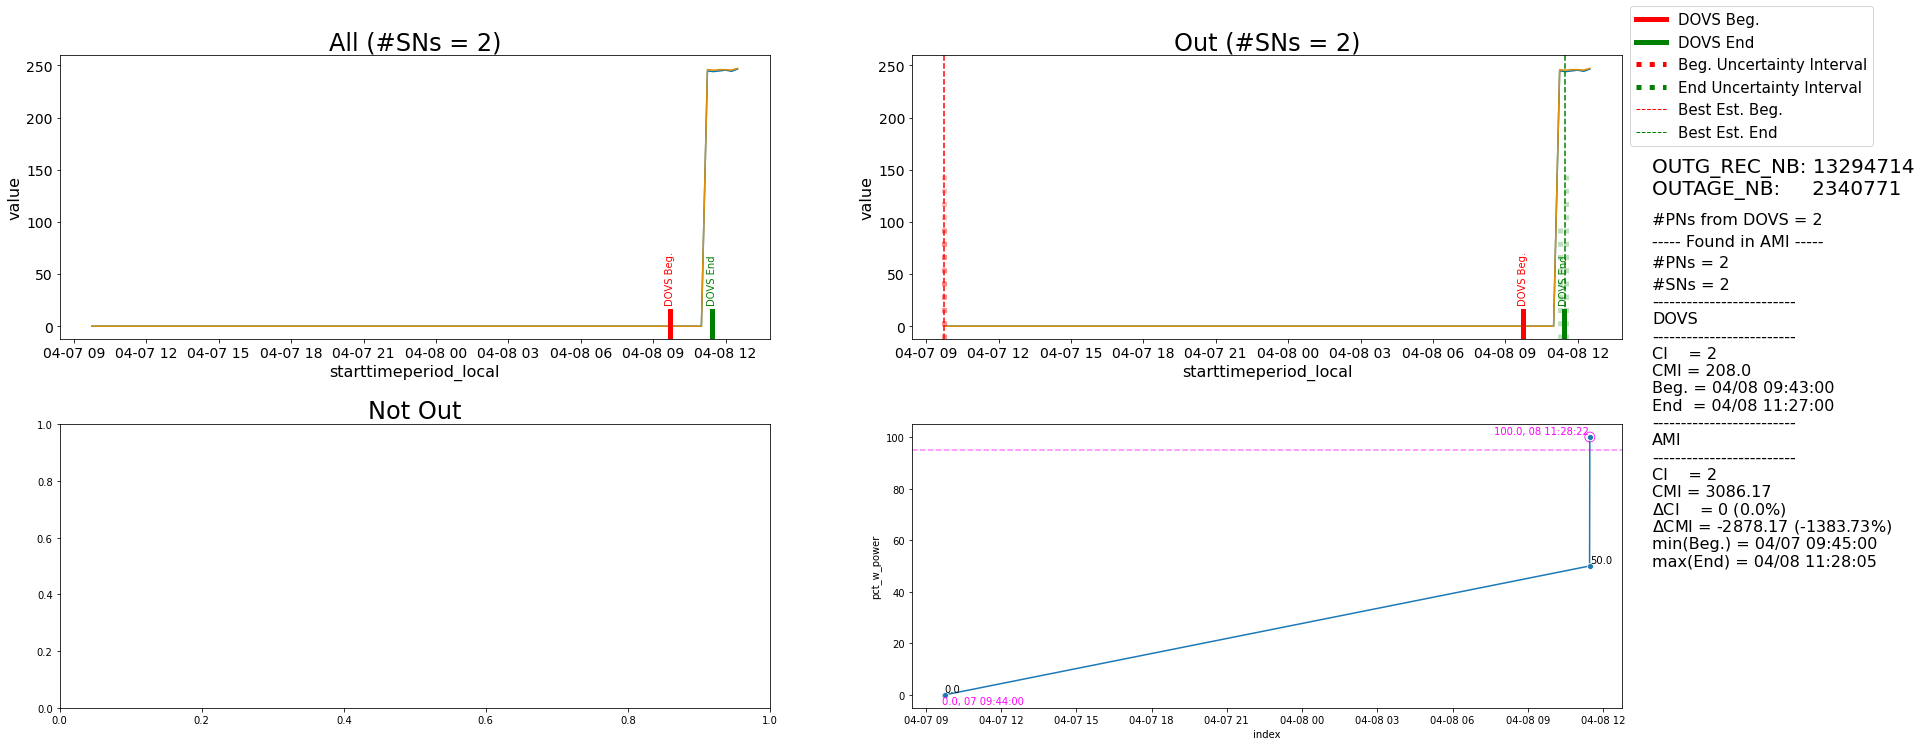

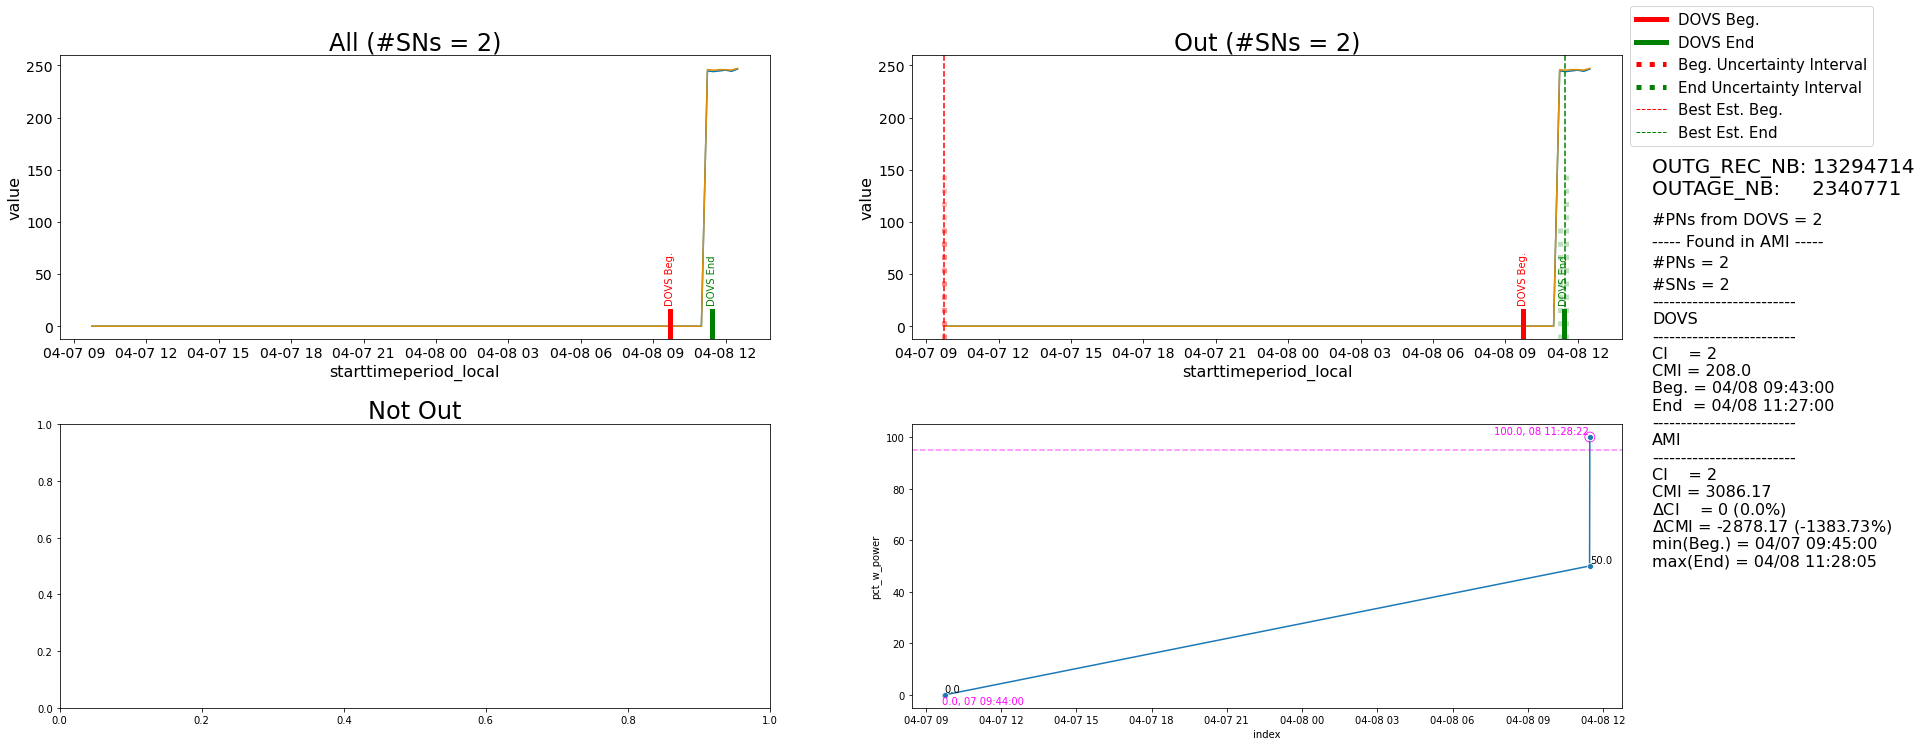

In [8]:
fig, axs = plot_all_out_not_NEW(
    fig_num              = fig_num, 
    ami_df_i             = ami_df_i, 
    ami_df_i_out         = ami_df_i_out, 
    ami_df_i_not_out     = ami_df_i_not_out, 
    dovs_outg_t_beg      = dovs_outg_t_beg, 
    dovs_outg_t_end      = dovs_outg_t_end, 
    cnsrvtv_out_t_beg    = best_ests_df['conservative_min'].min(), 
    cnsrvtv_out_t_end    = best_ests_df['conservative_max'].max(), 
    means_df             = means_df, 
    outg_rec_nb          = outg_rec_nb, 
    outage_nb            = outage_nb, 
    n_PNs_dovs           = n_PNs_dovs, 
    ci_dovs              = ci_dovs, 
    cmi_dovs             = cmi_dovs, 
    ci_ami               = ci_ami, 
    cmi_ami              = cmi_ami, 
    name                 = 'AMI', 
    results_2_dict       = None, 
    expand_time          = pd.Timedelta('1 hour'), 
    mean_keys_to_include = ['winner', 'conservative', 'zero_times'], 
    removed_due_to_overlap_col=None, 
    default_subplots_args=dict(n_x=2, n_y=2, row_major=True), 
    leg_i_plot=1, 
    leg_kwargs=dict(ncols=1, fontsize=15, bbox_to_anchor=(1, 1.2)), 
    ci_info_fontsize=16, 
    left_text_x=0.915
    
)

fig,axs[3] = DOVSAudit.plot_n_PNs_w_power_srs(
    n_PNs_w_power_srs, 
    simp_freq='1T', 
    threshold=threshold, 
    fig_num=fig_num, 
    fig_ax=(fig, axs[3]), 
    threshold_color='magenta'
)

fig_num += 1

In [ ]:
df = pd.read_pickle(r'C:\Users\s346557\Documents\LocalData\dovs_and_end_events_data\20231201\20230401_20230930\Outgs_Full\df_outage.pkl')

In [ ]:
df

In [ ]:
            mp_curr = MeterPremise(
                df_construct_type=DFConstructType.kRunSqlQuery, 
                init_df_in_constructor=True, 
                build_sql_function=MeterPremise.build_sql_meter_premise, 
                build_sql_function_kwargs=dict(
                    cols_of_interest=cols_of_interest_curr, 
                    premise_nbs=PNs, 
                    table_name='meter_premise'
                )
            )
            mp_df_curr = mp_curr.df